In [2]:
ls /data2/pancreas/Nifti_data


data_list.csv  image/  label/  prepareNifti.py


In [1]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(gpu_options=gpu_options)
tf.keras.backend.set_session(tf.Session(config=sess_config))

In [7]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [8]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')

In [9]:
info['total'] = [1]*len(info)
pd.DataFrame(info.groupby(['200_list', 'type']).sum().total)

total
200_list   type          
test       healthy     20
           tumor       20
train      healthy     60
           tumor       60
validation healthy     20
           tumor       20

In [10]:
#resection
pd.DataFrame(info.groupby("resection").sum().total)

total
resection       
0.0           96
1.0           86

In [11]:
resec0_names = info.groupby("resection").get_group(0).case_id.unique()
resec1_names = info.groupby("resection").get_group(1).case_id.unique()

In [12]:

image_dir = os.listdir("/data2/pancreas/Nifti_data/image")
label_dir = os.listdir("/data2/pancreas/Nifti_data/label")

In [163]:
#combine resec0 and resec1 and shuffle
resec = np.concatenate([resec0_names,resec1_names], axis = 0)
np.random.shuffle(resec)



In [14]:
info[info.case_id == resec[0]].resection 

101    0.0
Name: resection, dtype: float64

In [164]:
y = np.zeros((len(resec), 1))
for idx, name in enumerate(resec):
    y[idx] = info[info.case_id == name].resection


array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]])

# image check (between resec0 and resec1)


In [16]:
image_path = "/data2/pancreas/Nifti_data/image"
# image0 = load_image(os.path.join(image_path, "IM_"+resec0_names[0]+".nii.gz"))
# image1 = load_image(os.path.join(image_path, "IM_"+resec0_names[1]+".nii.gz"))

In [ ]:
image0 = load_image(os.path.join(image_path, "IM_"+resec0_names[0]+".nii.gz"))
image1 = load_image(os.path.join(image_path, "IM_"+resec0_names[1]+".nii.gz"))

In [119]:
label_path = "/data2/pancreas/Nifti_data/label"
label0 = load_image(os.path.join(label_path, "LB_"+resec0_names[0]+".nii.gz"))
label1 = load_image(os.path.join(label_path, "LB_"+resec0_names[1]+".nii.gz"))

/opt/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/opt/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/opt/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/opt/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/u/wartytw/.local/lib/python3.6/site-packages/numpy/ma/core.py:715: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


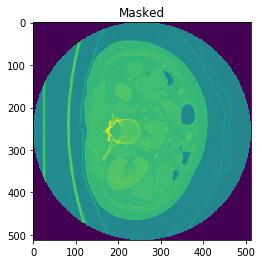

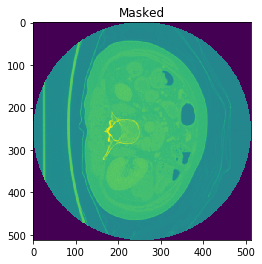

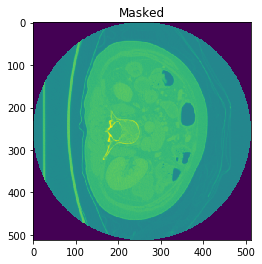

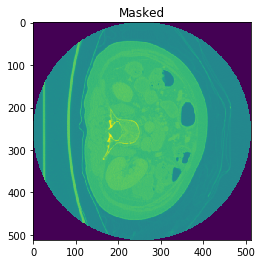

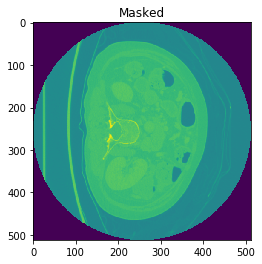

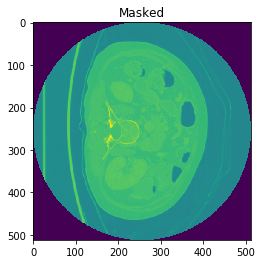

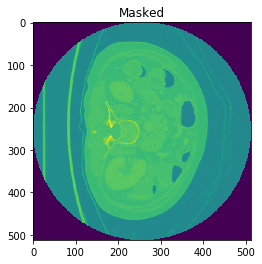

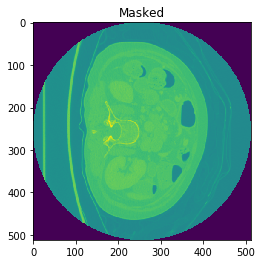

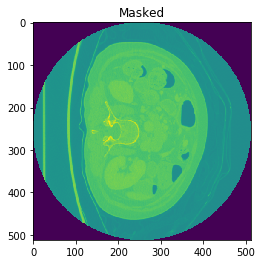

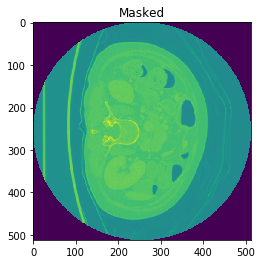

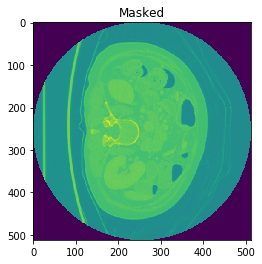

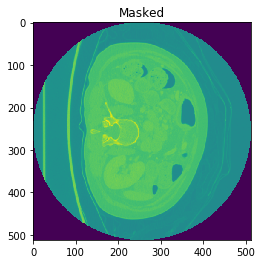

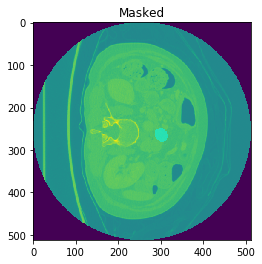

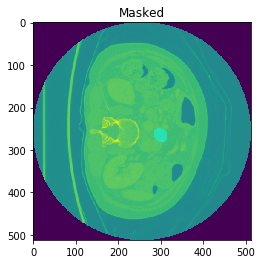

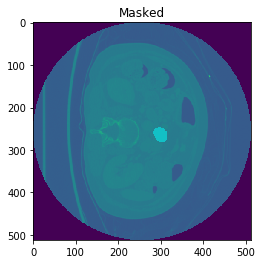

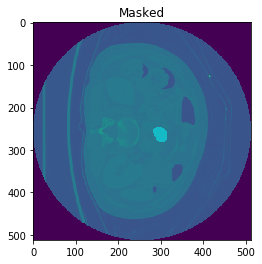

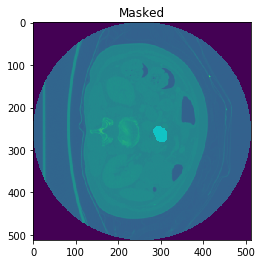

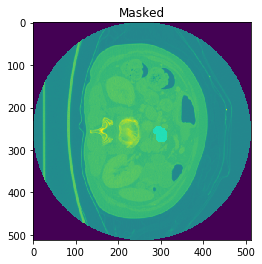

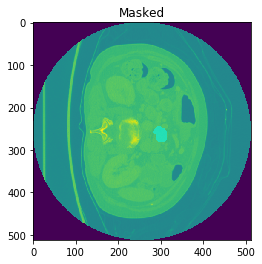

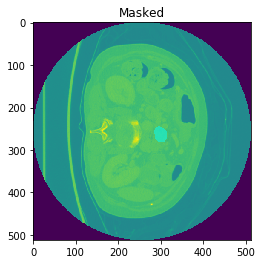

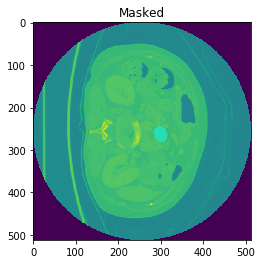

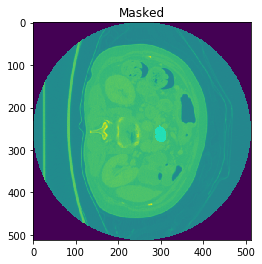

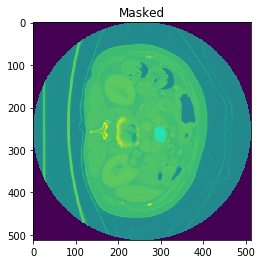

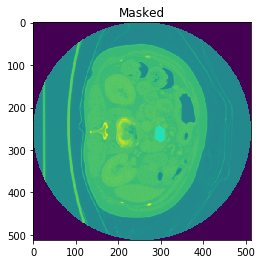

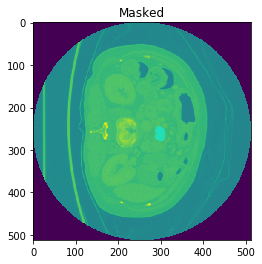

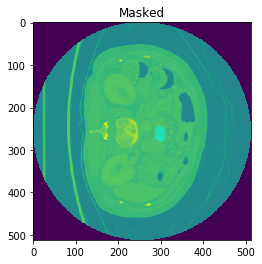

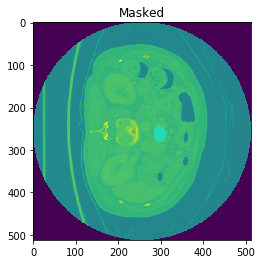

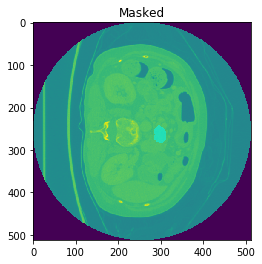

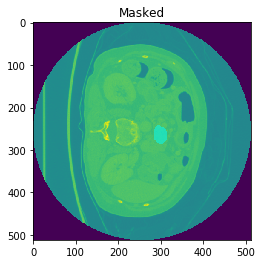

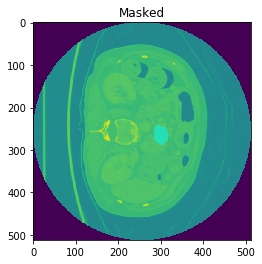

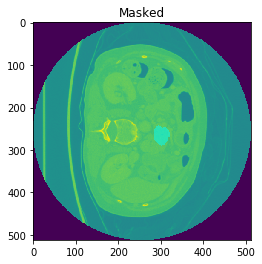

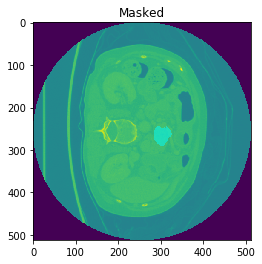

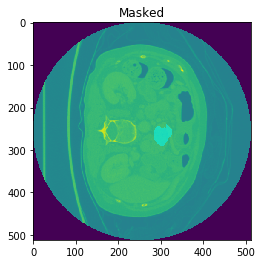

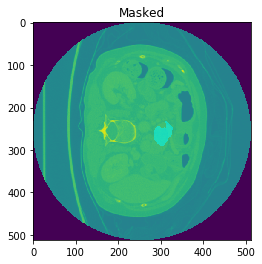

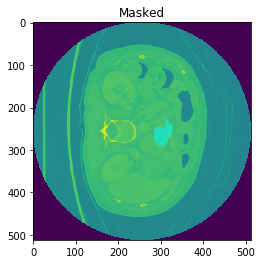

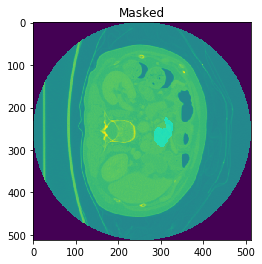

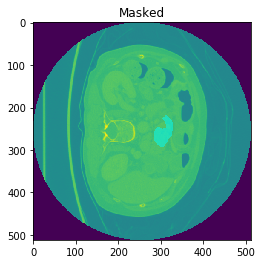

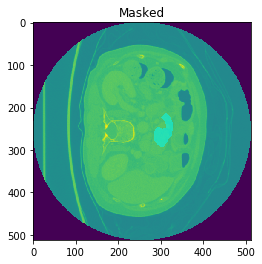

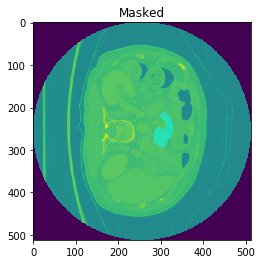

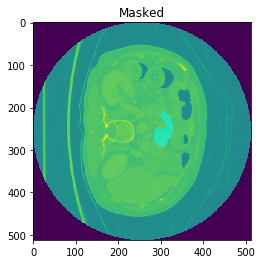

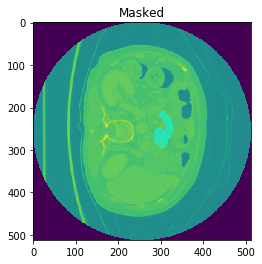

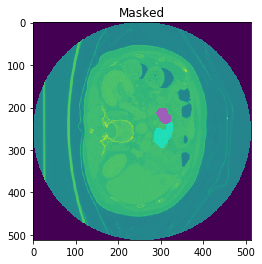

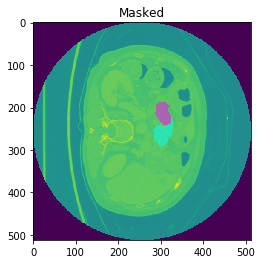

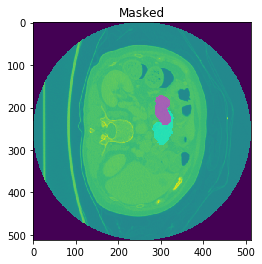

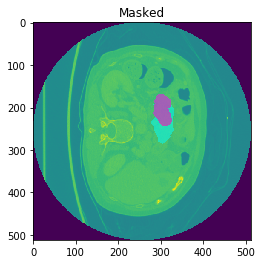

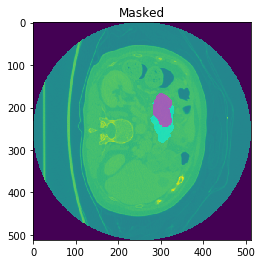

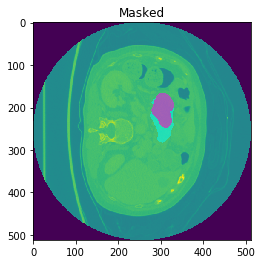

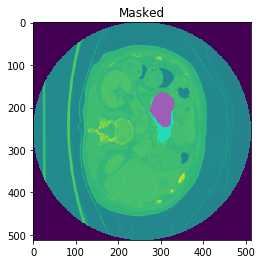

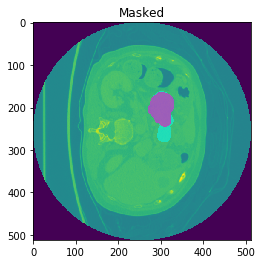

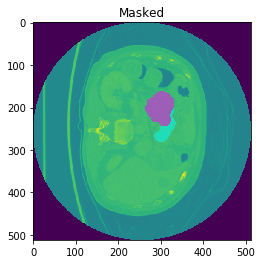

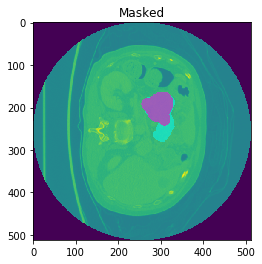

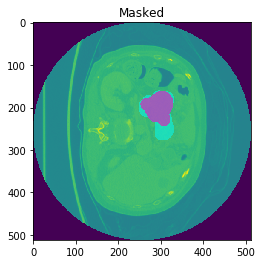

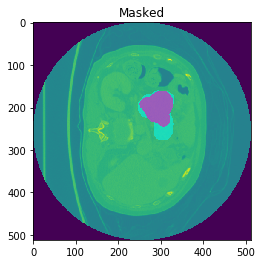

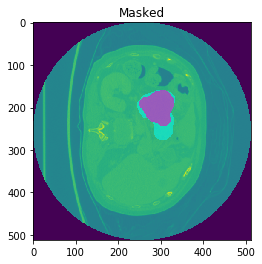

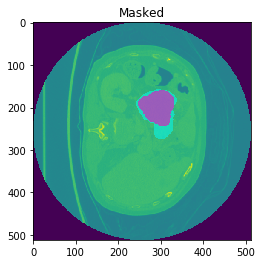

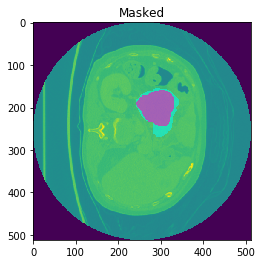

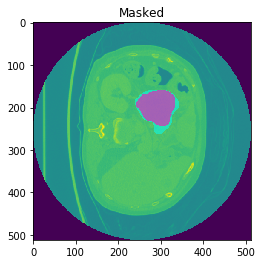

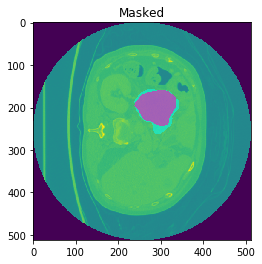

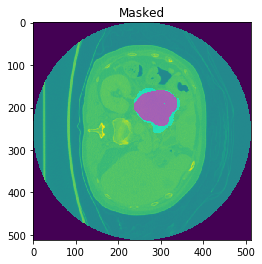

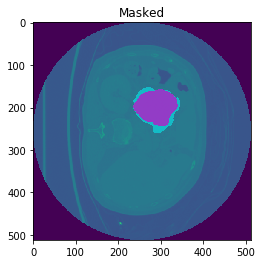

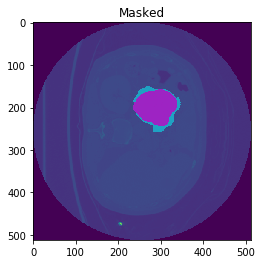

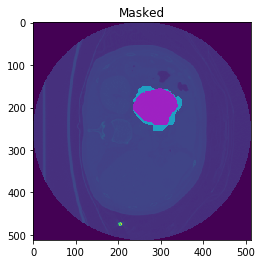

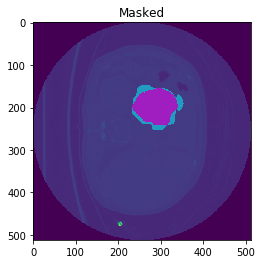

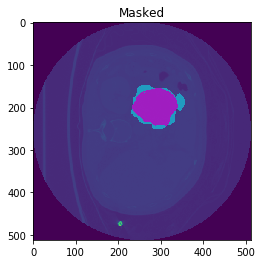

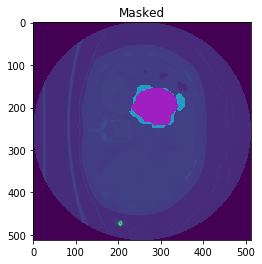

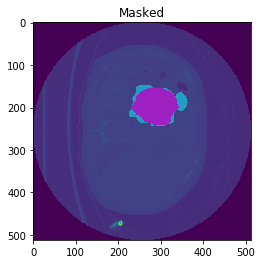

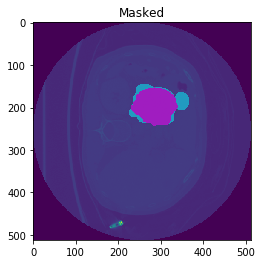

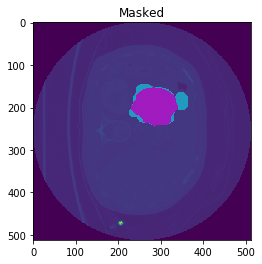

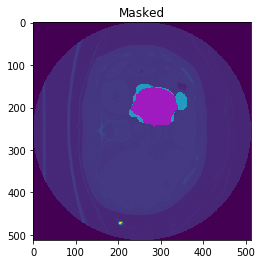

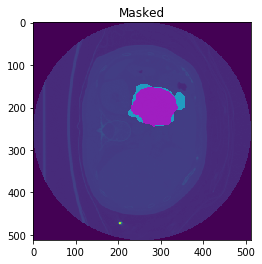

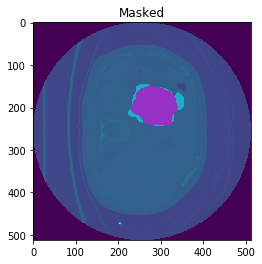

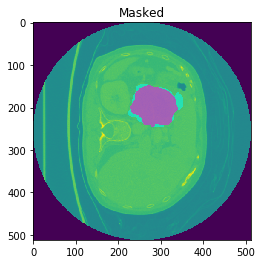

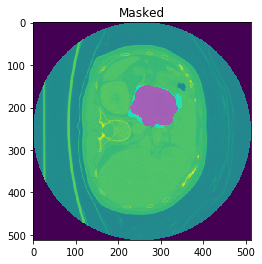

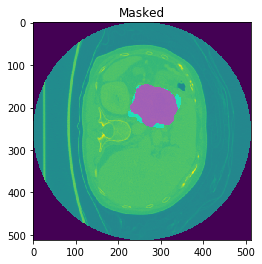

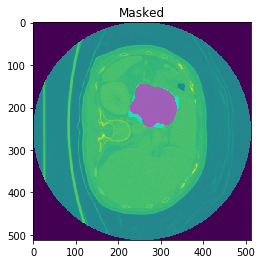

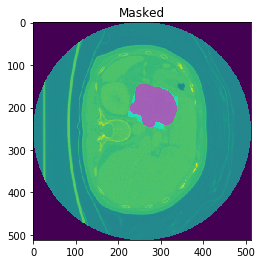

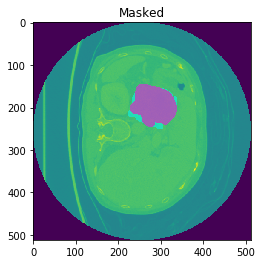

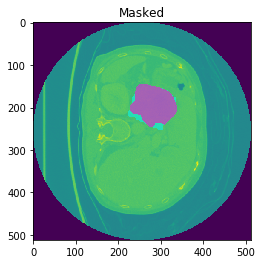

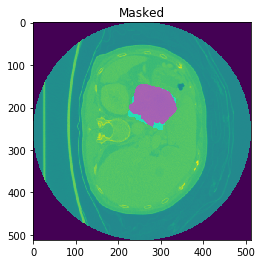

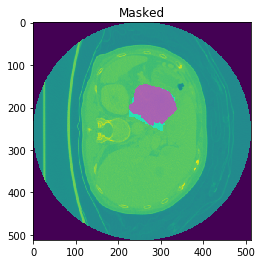

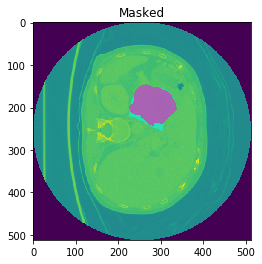

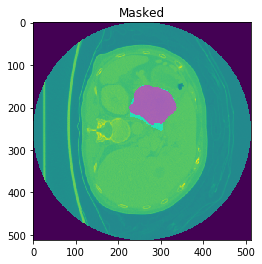

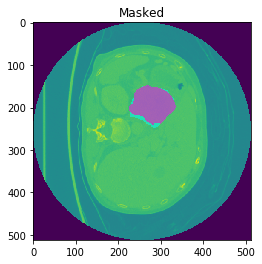

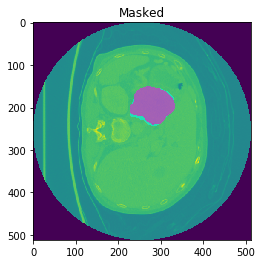

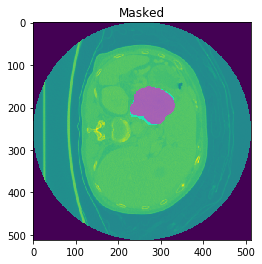

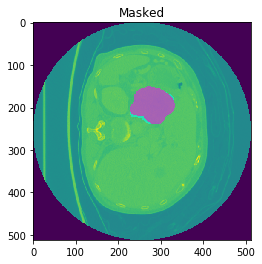

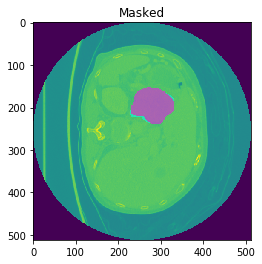

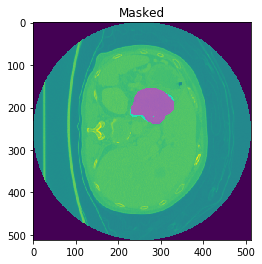

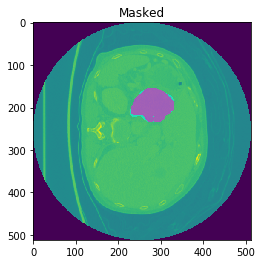

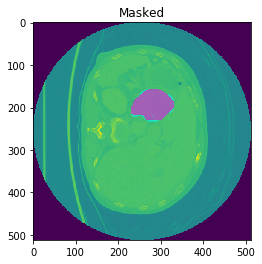

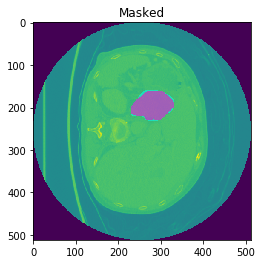

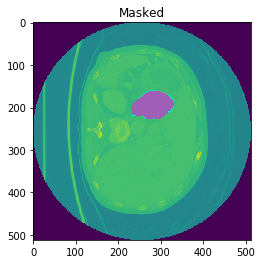

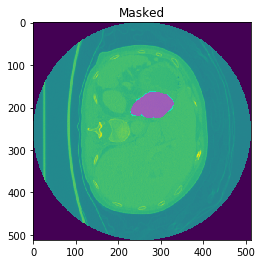

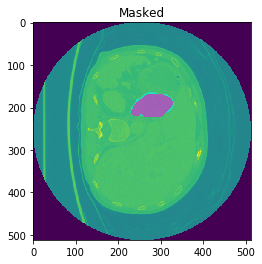

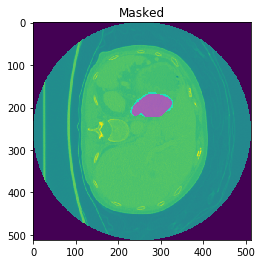

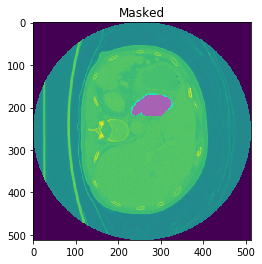

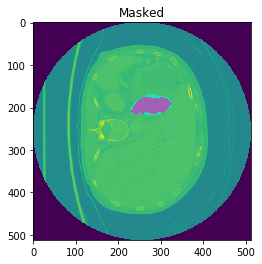

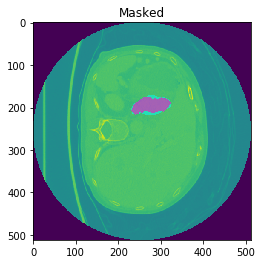

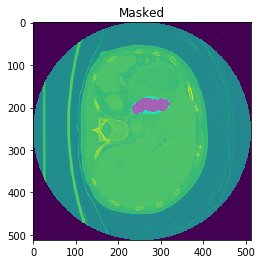

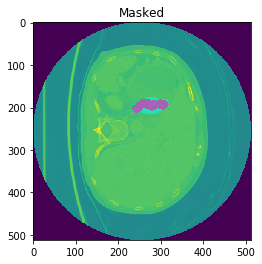

In [95]:
for i in range(280, 380):
    _slice = i
    masked = np.ma.masked_where(label0[:, :, _slice] == 0, label0[:, :, _slice])
    plt.imshow(image0[ :, :, _slice])
    plt.imshow(masked, cmap='cool', alpha=0.5)
    plt.title('Masked')
    plt.show()

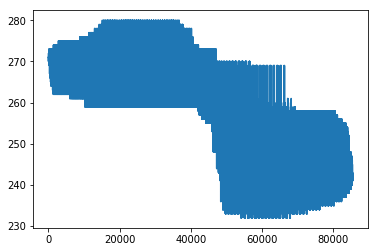

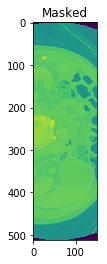

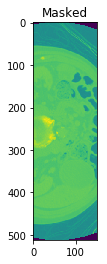

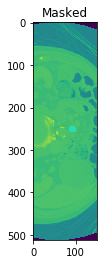

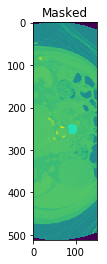

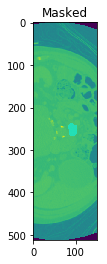

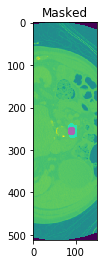

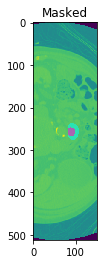

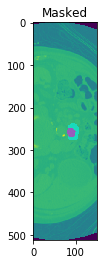

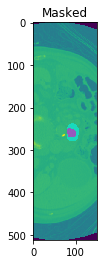

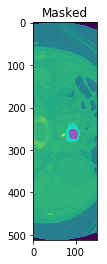

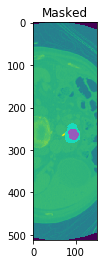

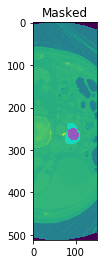

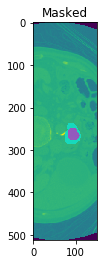

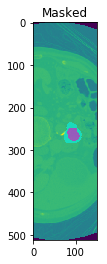

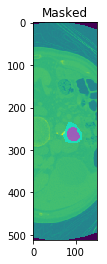

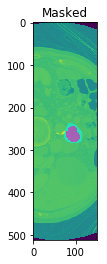

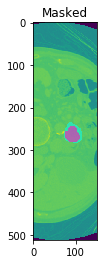

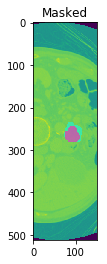

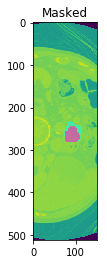

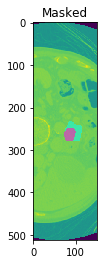

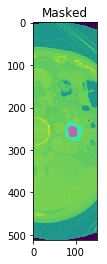

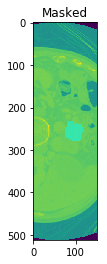

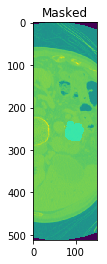

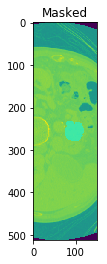

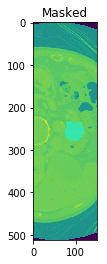

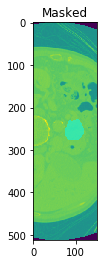

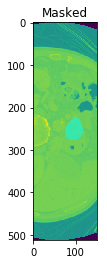

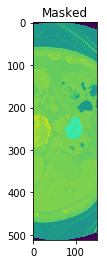

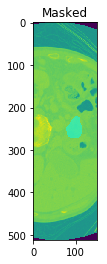

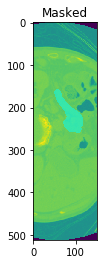

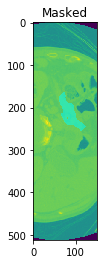

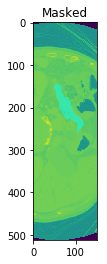

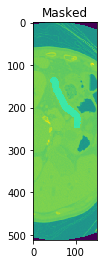

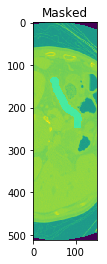

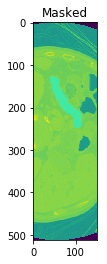

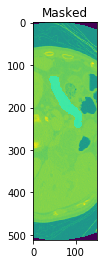

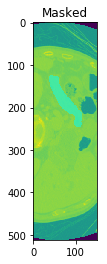

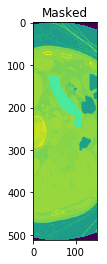

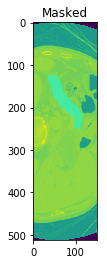

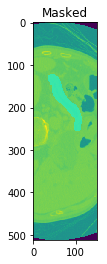

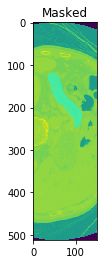

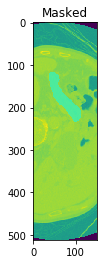

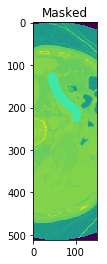

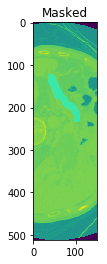

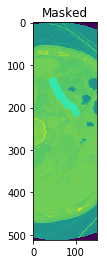

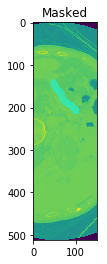

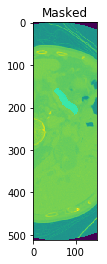

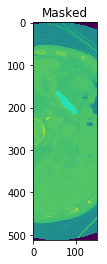

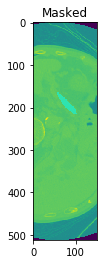

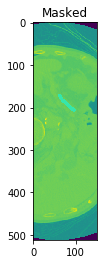

In [101]:
for i in range(230, 280):
    _slice = i
    masked = np.ma.masked_where(label1[:, 200:350, _slice] == 0, label1[:, 200:350, _slice])
    plt.imshow(image1[ :, 200:350, _slice])
    plt.imshow(masked, cmap='cool', alpha=0.5)
    plt.title('Masked')
    plt.show()

In [103]:
del image0, image1, label0, label1

In [104]:
#check the num. of image in terms of z-axis
img_shape = []
for name in resec:
    img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
    print(img.shape[2])
    img_shape.append(img.shape[2])
    del img


84
100
369
109
89
135
99
123
92
81
61
96
92
87
81
481
111
126
169
52
88
129
85
122
86
50
136
436
82
71
55
54
49
46
86
125
130
55
85
92
83
94
43
58
110
119
86
145
104
377
301
91
83
85
51
98
95
78
551
125
99
48
57
521
80
89
85
83
94
82
130
51
90
435
81
86
86
45
142
115
133
476
587
98
83
129
89
95
127
531
92
58
365
236
515
96
42
111
79
98
130
54
604
95
90
98
137
140
126
76
87
97
86
511
87
99
94
126
526
86
50
441
80
50
100
86
130
58
120
87
134
1023
82
123
93
94
85
87
53
92
103
369
99
46
94
88
94
88
125
557
84
54
48
48
46
50
95
436
98
138
100
45
130
61
33
126
94
37
44
86
41
53
100
76
47
35
96
84
50
123
58
90


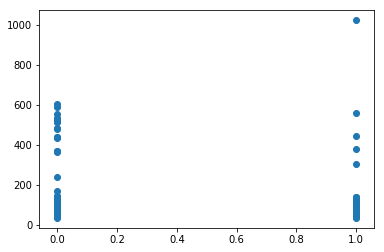

In [112]:
plt.scatter(y, img_shape)

In [115]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


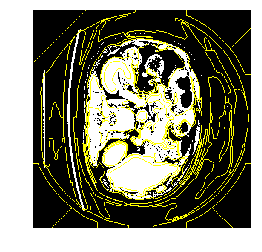

In [130]:
image = image0[..., 320]
segments = slic(img_as_float(image), n_segments = 100, sigma = 5)
 
# show the output of SLIC
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

(512, 512, 3)
(512, 512)


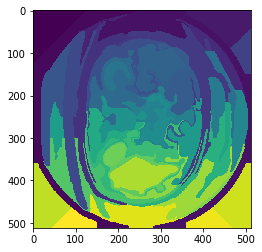

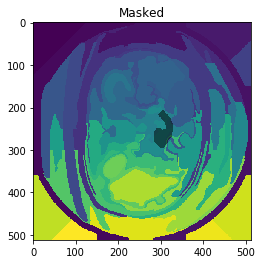

In [174]:
print(mark_boundaries(image, segments).shape)
print(segments.shape)

plt.imshow(segments)
plt.show()

masked = np.ma.masked_where(label0[:, :, _slice] == 0, label0[:, :, _slice])
plt.imshow(segments[ :, :])
plt.imshow(masked, cmap='gray', alpha=0.5)
plt.title('Masked')
plt.show()

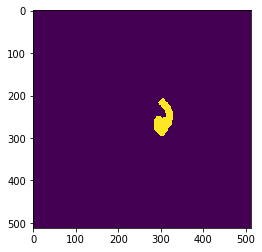

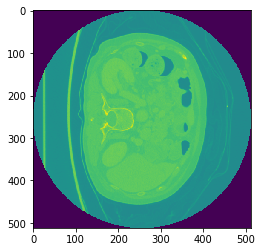

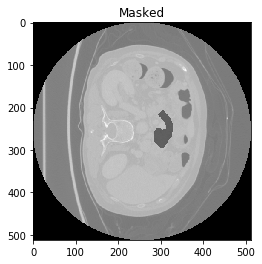

In [175]:
plt.imshow(label0[..., 320])
plt.show()
plt.imshow(image0[..., 320])
plt.show()

_slice = 320
masked = np.ma.masked_where(label0[:, :, _slice] == 0, label0[:, :, _slice])
plt.imshow(image0[ :, :, _slice], cmap = 'gray')
plt.imshow(masked, cmap='gray', alpha=0.5)
plt.title('Masked')
plt.show()

In [201]:
#check the z-axis with labels
label_median = []
label_length = []
for name in resec:
    img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
    label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
    print(img.shape[2])
    print(np.unique(np.where(label != 0)[2]).shape[0])
    print(int(np.median(np.where(label != 0)[2])))
    label_median.append(int(np.median(np.where(label != 0)[2])))
    label_length.append(np.unique(np.where(label != 0)[2]).shape[0])
    del img, label



84
13
57
100
16
67
369
77
236
109
15
74
89
20
66
135
10
75
99
12
68
123
13
60
92
16
65
81
13
58
61
14
30
96
15
67
92
21
66
87
11
57
81
17
61
481
74
337
111
21
74
126
13
65
169
62
70
52
14
24
88
13
61
129
9
60
85
17
58
122
19
67
86
14
49
50
15
28
136
15
77
436
78
330
82
11
58
71
13
49
55
13
27
54
14
29
49
16
21
46
14
22
86
12
60
125
17
65
130
14
62
55
15
23
85
13
62
92
16
68
83
13
62
94
14
64
43
14
18
58
8
31
110
22
76
119
15
67
86
12
57
145
22
103
104
13
79
377
100
116
301
91
159
91
15
59
83
13
59
85
11
62
51
19
16
98
17
67
95
19
68
78
11
55
551
75
375
125
14
61
99
15
70
48
15
23
57
14
25
521
49
261
80
15
60
89
16
60
85
17
59
83
20
60
94
16
62
82
18
59
130
15
65
51
16
20
90
16
65
435
71
328
81
17
59
86
18
58
86
15
56
45
9
31
142
17
75
115
15
89
133
19
68
476
91
348
587
73
301
98
16
73
83
16
61
129
19
68
89
19
64
95
16
67
127
21
74
531
88
401
92
16
68
58
10
30
365
43
284
236
83
118
515
76
340
96
16
72
42
17
18
111
15
75
79
12
56
98
19
62
130
11
63
54
13
28
604
90
316
95
16
69
90
14
32
9

In [203]:
label_median = np.array(label_median)

In [204]:
label_length = np.array(label_length)

In [280]:
img_shape

array([[  84],
       [ 100],
       [ 369],
       [ 109],
       [  89],
       [ 135],
       [  99],
       [ 123],
       [  92],
       [  81],
       [  61],
       [  96],
       [  92],
       [  87],
       [  81],
       [ 481],
       [ 111],
       [ 126],
       [ 169],
       [  52],
       [  88],
       [ 129],
       [  85],
       [ 122],
       [  86],
       [  50],
       [ 136],
       [ 436],
       [  82],
       [  71],
       [  55],
       [  54],
       [  49],
       [  46],
       [  86],
       [ 125],
       [ 130],
       [  55],
       [  85],
       [  92],
       [  83],
       [  94],
       [  43],
       [  58],
       [ 110],
       [ 119],
       [  86],
       [ 145],
       [ 104],
       [ 377],
       [ 301],
       [  91],
       [  83],
       [  85],
       [  51],
       [  98],
       [  95],
       [  78],
       [ 551],
       [ 125],
       [  99],
       [  48],
       [  57],
       [ 521],
       [  80],
       [  89],
       [  

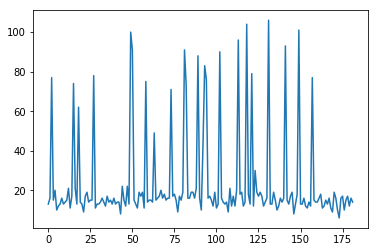

In [216]:
plt.plot(label_length)

In [139]:
img_shape = np.array(img_shape)
img_shape = img_shape.reshape(-1, 1)

In [188]:
#decision tree

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 6)
clf = clf.fit(img_shape[:-10, :], y[:-10, :])


In [189]:
clf.score(img_shape[-10:, :], y[-10:, :])

0.4

In [190]:
y_pred = clf.predict(img_shape[-10:, :])
y_true = y[-10:, :]

from sklearn import metrics

print(metrics.precision_score(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred))
print(clf.score(img_shape[-10:, :], y[-10:, :]))

0.3333333333333333
0.2
0.4


In [5]:
from keras.models import Model, load_model
from keras import layers as klayers
from keras.optimizers import Adam
from keras import utils as kutils
from keras import backend as K
from keras.callbacks import ModelCheckpoint



from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
#from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
#import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

#init_notebook_mode(connected=True)
%matplotlib inline


from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, concatenate,  MaxPool2D
# from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Lambda
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv1D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# model = Sequential()
# model.add(LSTM(32, input_shape=(50, 2)))
# model.add(Dense(1))





#100:400 200:360 
#60:5, 40:4, +-20 median   24 inouts 



Using TensorFlow backend.


In [284]:
tmp_x = Input((60, 40, 30, 1))
x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(tmp_x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool3D()(x)



x = Flatten()(x)

a = Dense(units=500, kernel_initializer='normal', activation='softmax', name = 'o11')(x)
b = Dense(units=1, kernel_initializer='normal', activation='linear', name = 'o22')(x)

model = Model(inputs=tmp_x, outputs=[a, b])
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
              loss=['categorical_crossentropy', 'mse'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_209 (InputLayer)          (None, 60, 40, 30, 1 0                                            
__________________________________________________________________________________________________
conv3d_616 (Conv3D)             (None, 58, 38, 28, 3 896         input_209[0][0]                  
__________________________________________________________________________________________________
batch_normalization_610 (BatchN (None, 58, 38, 28, 3 128         conv3d_616[0][0]                 
__________________________________________________________________________________________________
max_pooling3d_619 (MaxPooling3D (None, 29, 19, 14, 3 0           batch_normalization_610[0][0]    
__________________________________________________________________________________________________
conv3d_617

In [47]:
4%2

0

In [222]:
#100:400 200:360 
#60:5, 40:4, +-20 median   24 inouts 
def clip_img(img):# make image to be in shape of (300, 160, 200)
    img = img[100:400, 200:360, :]
    _med = int(img.shape[2]/2)
    tmp_img = np.zeros((300, 160, 200))
    if img.shape[2] < 200:
        a = img.shape[2]
        tmp_img[:, :, 100-_med : 100-_med+a] = img
    else:
        tmp_img = img[:, :, _med-100 : _med+100 ]
    img = tmp_img
    del tmp_img
    return img
    
def extract_cube(img, i):#Input((60, 40, 30, 1)) ; the i-th cube
    j = i%5
    k = i%4
    l = i%2
    #print(img[j*60:(j+1)*60, k*40:(1+k)*40, l*30:(l+1)*30].shape)
    return img[j*60:(j+1)*60, k*40:(1+k)*40, l*100:(l+1)*100]
    
    
    

array([0., 1.], dtype=float32)

In [114]:
import pandas as pd
#y_idx => for construct (500, 1) vector
map_df = pd.DataFrame(data={'resec_name': resec, 'target':y.reshape(182)})

In [226]:
from keras.utils import to_categorical

class resec_Generator(kutils.Sequence):
    'Generates data for Keras'
    def __init__(self, mapping_df, batch_size, shuffle=True):
        'Initialization'
        self.mapping_df = mapping_df
        self.data_num   = mapping_df.shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.data_num / self.batch_size))


    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        #print("enter0")
        batch_mapping_df = \
            self.mapping_df.iloc[index*self.batch_size: (index+1)*self.batch_size]

        # Generate data
        X, y = self.__data_generation(batch_mapping_df)
        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            self.mapping_df = self.mapping_df.sample(frac=1).reset_index(drop=True)
            
    def __data_generation(self, batch_mapping_df):
        'Generates data containing batch_size samples' 
        # Initialization
        X = [np.zeros((self.batch_size, 60, 40, 100, 1)) for i in range(40)]
        y = np.zeros((self.batch_size))

        # Generate data
        cnt = 0
        
        for i, row in batch_mapping_df.iterrows():
            img = clip_img(load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            #print("resec_name =", row['resec_name'])
            for j in range(40):
                #print("img shape =", img.shape)
                #print("j =", j)
                X[j][cnt, :, :, :, 0] = extract_cube(img, j)
            y[cnt] = row['target']

#             position = extract_position(row['ref_idx'], row['point_idx'])
#             tmp_cube = extract_cube(position, row['ref_idx'])
#             if (tmp_cube.shape == (19, 19, 19)):
#                 X[cnt, :, :, :, 0] = extract_cube(position, row['ref_idx'])
#             else:
#                 X[cnt, :, :, :, 0] = np.zeros((19, 19, 19))
#             y_idx = row['y_idx']
#             radius = ref[row['ref_idx']][row['point_idx'], 3]
#             y1[cnt, y_idx] = 1
#             y2[cnt, 0] = radius
            cnt += 1
        #print(X[5])
        return X, y

# for name in resec:
#     img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))

In [232]:
batch_size = 1
v_generator = resec_Generator(map_df[:-50], batch_size=batch_size)
validation_generator = resec_Generator(map_df[-50:-30], batch_size=batch_size)

In [235]:
del model

In [237]:
## input layer
from keras import metrics
xs = []
input_set = []
for i in range(40):
    tmp_x = Input((60, 40, 100, 1))
    input_set.append(tmp_x)
    x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), kernel_initializer=keras.initializers.glorot_normal(seed=None), activation='selu')(tmp_x)
    #x = BatchNormalization()(x)

    x = MaxPool3D()(x)

    x = Conv3D(filters=16, dilation_rate=1, kernel_size=(3, 3, 3),  activation='relu')(x)
    #x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = MaxPool3D()(x)

    x = Conv3D(filters=8, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
    #x = BatchNormalization()(x)
  
    x = MaxPool3D()(x)
    
    
    
    xs.append(x)
    
x = xs[0]
for i in range(1, 40):
    x = concatenate([x, xs[i]], axis = 4)
    

x = MaxPool3D()(x)
x = Conv3D(filters=32, dilation_rate=1, kernel_size=(1, 1, 1), kernel_initializer=keras.initializers.glorot_normal(seed=None), activation='selu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Conv3D(filters=8, dilation_rate=1, kernel_size=(1, 1, 1), activation='selu')(x)
x = BatchNormalization()(x)







x = Flatten()(x)

x = Dense(units=500, kernel_initializer='normal', activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=100, kernel_initializer='normal', activation='relu')(x)

x = Dense(units=50, kernel_initializer='normal', activation='selu')(x)
x = Dense(units=1, kernel_initializer='normal', activation='sigmoid')(x)


model = Model(inputs=input_set, outputs=x)
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
              loss='binary_crossentropy', metrics = [metrics.binary_accuracy])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_656 (InputLayer)          (None, 60, 40, 100,  0                                            
__________________________________________________________________________________________________
input_657 (InputLayer)          (None, 60, 40, 100,  0                                            
__________________________________________________________________________________________________
conv3d_1994 (Conv3D)            (None, 58, 38, 98, 3 896         input_656[0][0]                  
__________________________________________________________________________________________________
conv3d_1997 (Conv3D)            (None, 58, 38, 98, 3 896         input_657[0][0]                  
__________________________________________________________________________________________________
input_658 

In [260]:
history = model.fit_generator(v_generator,
                              epochs=4, validation_data=validation_generator)

Epoch 1/4
132/132 [==============================] - 393s 3s/step - loss: 0.6138 - binary_accuracy: 0.6818 - val_loss: 0.6116 - val_binary_accuracy: 0.6667
Epoch 2/4
132/132 [==============================] - 396s 3s/step - loss: 0.5932 - binary_accuracy: 0.7197 - val_loss: 0.6167 - val_binary_accuracy: 0.6333
Epoch 3/4
132/132 [==============================] - 393s 3s/step - loss: 0.6028 - binary_accuracy: 0.6364 - val_loss: 0.5927 - val_binary_accuracy: 0.6333
Epoch 4/4
132/132 [==============================] - 399s 3s/step - loss: 0.5902 - binary_accuracy: 0.6818 - val_loss: 0.6056 - val_binary_accuracy: 0.6667


In [143]:
#epochs = 4
validation_generator = resec_Generator(map_df[-20:],batch_size )
model.evaluate_generator(validation_generator, batch_size)

[0.4712077707052231, 0.7600000143051148]

In [254]:
#epochs = 8
validation_generator = resec_Generator(map_df[-30:],batch_size )
model.evaluate_generator(validation_generator, batch_size)

[0.8203079700469971, 0.0]

In [256]:
#epochs = 4
validation_generator = resec_Generator(map_df[-30:],batch_size )
model.evaluate_generator(validation_generator, batch_size)

[0.44751471281051636, 1.0]

In [261]:
import math
bs = 1

predict_generator = resec_Generator(map_df[-30:] , bs)
pred = model.predict_generator(predict_generator,  verbose = 1, pickle_safe=False)

/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<__main__...., verbose=1, use_multiprocessing=False)`
  """


30/30 [==============================] - 37s 1s/step


In [258]:
np.concatenate([np.round(pred), np.array(map_df.target[-30:]).reshape(-1, 1)], axis = 1)

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.]])

In [259]:
from sklearn.metrics import confusion_matrix
confusion_matrix(map_df.target[-30:], list(np.round(pred)))

array([[11,  5],
       [ 4, 10]])

In [262]:
#2
from sklearn.metrics import confusion_matrix
confusion_matrix(map_df.target[-30:], list(np.round(pred)))

array([[ 5, 11],
       [ 5,  9]])

In [247]:
pred

array([[0.48760346],
       [0.57675916],
       [0.51926434],
       [0.5534894 ],
       [0.52973264],
       [0.5492463 ],
       [0.5959997 ],
       [0.5008312 ],
       [0.6244902 ],
       [0.60389155],
       [0.6055827 ],
       [0.40095252],
       [0.5514966 ],
       [0.40473542],
       [0.5684432 ],
       [0.46408597],
       [0.5318628 ],
       [0.36569336],
       [0.55278856],
       [0.36890677],
       [0.49200198],
       [0.5677122 ],
       [0.55852   ],
       [0.4433056 ],
       [0.522846  ],
       [0.5044557 ],
       [0.47650746],
       [0.5035152 ],
       [0.5018712 ],
       [0.5403991 ]], dtype=float32)

In [203]:
np.concatenate([np.round(pred), np.array(map_df.target[-30:]).reshape(-1, 1)], axis = 1)

array([[0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.]])

In [198]:
map_df.target[-30:].shape
np.round(pred).shape

(30, 1)

In [195]:
map_df.target[-30:]

152    1.0
153    1.0
154    0.0
155    1.0
156    1.0
157    1.0
158    1.0
159    1.0
160    1.0
161    1.0
162    0.0
163    0.0
164    0.0
165    0.0
166    1.0
167    1.0
168    0.0
169    0.0
170    0.0
171    0.0
172    0.0
173    0.0
174    0.0
175    1.0
176    1.0
177    0.0
178    0.0
179    0.0
180    0.0
181    1.0
Name: target, dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [152]:
model.predict_classes(predict_generator)

AttributeError: 'Model' object has no attribute 'predict_classes'

In [160]:
map_df

resec_name  target
0         PT37     0.0
1        PC596     1.0
2        PC139     0.0
3        PC568     1.0
4        PC387     0.0
5        PC322     0.0
6        PC290     0.0
7        PC630     0.0
8         PT42     1.0
9        PC335     0.0
10       PC336     0.0
11       PC619     0.0
12       PC285     1.0
13       PC550     1.0
14       PC267     0.0
15       PC273     0.0
16       PC242     0.0
17       PC556     1.0
18        PC58     1.0
19        PT39     0.0
20       PC584     1.0
21       PC543     1.0
22       PC605     1.0
23        PC54     0.0
24        PC78     0.0
25       PC549     1.0
26        PT44     0.0
27       PC647     0.0
28        PC40     0.0
29       PC603     1.0
..         ...     ...
152      PC358     1.0
153      PC534     1.0
154       PC39     0.0
155      PC648     1.0
156      PC580     1.0
157      PC110     1.0
158      PC546     1.0
159      PC542     1.0
160      PC563     1.0
161      PC613     1.0
162      PC160     0.0
163      PC319     0.0
164        PT2     0.0
165      PC252     0.0
166      PC555     1.0
167      PC650     1.0
168       PT14     0.0
169      PC170     0.0
170      PC629     0.0
171       PT46     0.0
172        PT1     0.0
173        PC5     0.0
174      PC115     0.0
175      PC535     1.0
176      PC515     1.0
177      PC294     0.0
178      PC306     0.0
179      PC176     0.0
180      PC618     0.0
181      PC349     1.0

[182 rows x 2 columns]

array(['PT37', 'PC596', 'PC139', 'PC568', 'PC387', 'PC322', 'PC290',
       'PC630', 'PT42', 'PC335', 'PC336', 'PC619', 'PC285', 'PC550',
       'PC267', 'PC273', 'PC242', 'PC556', 'PC58', 'PT39', 'PC584',
       'PC543', 'PC605', 'PC54', 'PC78', 'PC549', 'PT44', 'PC647', 'PC40',
       'PC603', 'PC348', 'PC91', 'PC332', 'PC256', 'PC623', 'PC581',
       'PC564', 'PC573', 'PC539', 'PC513', 'PC105', 'PC536', 'PC548',
       'PC651', 'PC589', 'PC560', 'PT49', 'PC89', 'PC50', 'PC246',
       'PC103', 'PC585', 'PC552', 'PC159', 'PC510', 'PC166', 'PC181',
       'PC116', 'PC544', 'PT59', 'PC607', 'PT12', 'PC83', 'PC277', 'PT6',
       'PC269', 'PC303', 'PC278', 'PC621', 'PC152', 'PC96', 'PC553',
       'PC251', 'PC537', 'PC572', 'PC38', 'PC653', 'PT52', 'PT8', 'PC636',
       'PC97', 'PC350', 'PC42', 'PC612', 'PC37', 'PC143', 'PC63', 'PC538',
       'PC107', 'PC295', 'PC614', 'PC27', 'PC41', 'PC123', 'PT51', 'PC72',
       'PC627', 'PC567', 'PC554', 'PC652', 'PC545', 'PC582', 'PC70',
      